# Упражнение 2

### Создать полигон из списка координат

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

# Корректное отображение графиков в jupyter
%matplotlib inline

# Долгота в десятичных долях градуса
longitudes = [29.99671173095703, 31.58196258544922, 27.738052368164062, 26.50013542175293, 26.652359008789062, 25.921663284301758, 22.90027618408203, 23.257217407226562,
           23.335693359375, 22.87444305419922, 23.08465003967285, 22.565473556518555, 21.452774047851562, 21.66388702392578, 21.065969467163086, 21.67659568786621,
           21.496871948242188, 22.339998245239258, 22.288192749023438, 24.539581298828125, 25.444232940673828, 25.303749084472656, 24.669166564941406, 24.689163208007812,
           24.174999237060547, 23.68471908569336, 24.000761032104492, 23.57332992553711, 23.76513671875, 23.430830001831055, 23.6597900390625, 20.580928802490234, 21.320831298828125,
           22.398330688476562, 23.97638702392578, 24.934917449951172, 25.7611083984375, 25.95930290222168, 26.476804733276367, 27.91069221496582, 29.1027774810791, 29.29846954345703,
           28.4355525970459, 28.817358016967773, 28.459857940673828, 30.028610229492188, 29.075136184692383, 30.13492774963379, 29.818885803222656, 29.640830993652344, 30.57735824584961,
           29.99671173095703]

# Широта в десятичных долях градуса
latitudes = [63.748023986816406, 62.90789794921875, 60.511383056640625, 60.44499588012695, 60.646385192871094, 60.243743896484375, 59.806800842285156, 59.91944122314453,
           60.02395248413086, 60.14555358886719, 60.3452033996582, 60.211936950683594, 60.56249237060547, 61.54027557373047, 62.59798049926758, 63.02013397216797,
           63.20353698730469, 63.27652359008789, 63.525691986083984, 64.79915618896484, 64.9533920288086, 65.51513671875, 65.65470886230469, 65.89610290527344, 65.79151916503906,
           66.26332092285156, 66.80228424072266, 67.1570053100586, 67.4168701171875, 67.47978210449219, 67.94589233398438, 69.060302734375, 69.32611083984375, 68.71110534667969,
           68.83248901367188, 68.580810546875, 68.98916625976562, 69.68568420410156, 69.9363784790039, 70.08860778808594, 69.70597076416016, 69.48533630371094, 68.90263366699219,
           68.84700012207031, 68.53485107421875, 67.69471740722656, 66.90360260009766, 65.70887756347656, 65.6533203125, 64.92096710205078, 64.22373962402344, 63.748023986816406]

In [2]:
# подготовка списка координат coordpairs
coordpairs = []
print(coordpairs)
for x, y in zip(longitudes, latitudes):  # формируем пары долгота широта - точки и добавляем в список
    coordpairs.append(Point(x, y))

[]


In [3]:
print(coordpairs[0])

POINT (29.99671173095703 63.74802398681641)


In [4]:
poly = Polygon(coordpairs)
print(poly)

POLYGON ((29.99671173095703 63.74802398681641, 31.58196258544922 62.90789794921875, 27.73805236816406 60.51138305664062, 26.50013542175293 60.44499588012695, 26.65235900878906 60.64638519287109, 25.92166328430176 60.24374389648438, 22.90027618408203 59.80680084228516, 23.25721740722656 59.91944122314453, 23.335693359375 60.02395248413086, 22.87444305419922 60.14555358886719, 23.08465003967285 60.3452033996582, 22.56547355651855 60.21193695068359, 21.45277404785156 60.56249237060547, 21.66388702392578 61.54027557373047, 21.06596946716309 62.59798049926758, 21.67659568786621 63.02013397216797, 21.49687194824219 63.20353698730469, 22.33999824523926 63.27652359008789, 22.28819274902344 63.52569198608398, 24.53958129882812 64.79915618896484, 25.44423294067383 64.95339202880859, 25.30374908447266 65.51513671875, 24.66916656494141 65.65470886230469, 24.68916320800781 65.89610290527344, 24.17499923706055 65.79151916503906, 23.68471908569336 66.26332092285156, 24.00076103210449 66.8022842407226

In [5]:
print(poly.geom_type)

Polygon


### Вставить полигон в GeoDataFrame под названием geo:

In [6]:
# пучтой GeoDataFrame
geo = gpd.GeoDataFrame()
print(geo)

Empty GeoDataFrame
Columns: []
Index: []


In [7]:
# добавим строку с колонкой 'geometry' - данные полигона 
geo.at[0, 'geometry'] = poly
geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  1 non-null      geometry
dtypes: geometry(1)
memory usage: 96.0 bytes


In [8]:
print(geo.head())

                                            geometry
0  POLYGON ((29.99671 63.74802, 31.58196 62.90790...


In [9]:
print(len(geo))

1


<AxesSubplot:>

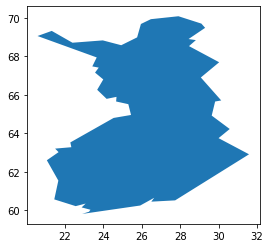

In [10]:
# построить полигон
geo.plot()

### сохранить GeoDataFrame в Шейп-файл под названием polygon.shp

In [11]:
# Текущая директория
ROOT_PATH = os.path.abspath(os.curdir)
fp = os.path.join(ROOT_PATH, r"data\polygon.shp")
geo.to_file(fp)

In [12]:
# проерка сохранился объект или нет
assert os.path.isfile(fp), "Output file does not exits."

### Точки на карте 

##### Наша цель - построить карту на основе набора координат долготы и широты, хранящихся в csv-файле. Координаты указаны в десятичных градусах WGS84 (EPSG:4326), а данные хранятся в файле some_posts.csv, разделенном запятыми, в папке data.

In [13]:
import pandas as pd
from pyproj import CRS

fp = os.path.join(ROOT_PATH, r"data\some_posts.csv")
# Pandas DataFrame
data = pd.read_csv(fp)
data['geometry'] = None
# преобразуем DataFrame в GeoDataFrame
geo = gpd.GeoDataFrame(data, geometry='geometry', crs=CRS.from_epsg(4326).to_wkt())
geo_iter = data.copy()
geo

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,None
1,-25.499225,31.508906,2015-07-07 03:18,65281761,None
2,-24.342578,30.930866,2015-03-07 03:38,90916112,None
3,-24.854614,31.519718,2015-10-07 05:04,37959089,None
4,-24.921069,31.520836,2015-10-07 05:19,27793716,None
...,...,...,...,...,...
81374,-24.799541,31.354469,2015-09-05 02:23,90744213,None
81375,-25.467992,30.956033,2015-02-05 02:40,71109799,None
81376,-25.332223,30.997409,2015-08-05 02:40,54796261,None
81377,-25.508851,31.005536,2015-08-05 02:43,78762204,None


In [14]:
geo['geometry'] = Point(zip(geo["lon"], geo["lat"]))
geo.head()

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (31.48463 -24.98079)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (31.48463 -24.98079)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (31.48463 -24.98079)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (31.48463 -24.98079)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (31.48463 -24.98079)


In [15]:
geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 81379 entries, 0 to 81378
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   lat        81379 non-null  float64 
 1   lon        81379 non-null  float64 
 2   timestamp  81379 non-null  object  
 3   userid     81379 non-null  int64   
 4   geometry   81379 non-null  geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 3.1+ MB


In [16]:
geo_iter.head() 

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,None
1,-25.499225,31.508906,2015-07-07 03:18,65281761,None
2,-24.342578,30.930866,2015-03-07 03:38,90916112,None
3,-24.854614,31.519718,2015-10-07 05:04,37959089,None
4,-24.921069,31.520836,2015-10-07 05:19,27793716,None


In [17]:
# Преобразование фрейма данных в GeoDataFrame с помощью конструктора geopandas GeoDataFrame.
gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.lon, data.lat))
gdf

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (31.48463 -24.98079)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (31.50891 -25.49922)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (30.93087 -24.34258)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (31.51972 -24.85461)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (31.52084 -24.92107)
...,...,...,...,...,...
81374,-24.799541,31.354469,2015-09-05 02:23,90744213,POINT (31.35447 -24.79954)
81375,-25.467992,30.956033,2015-02-05 02:40,71109799,POINT (30.95603 -25.46799)
81376,-25.332223,30.997409,2015-08-05 02:40,54796261,POINT (30.99741 -25.33222)
81377,-25.508851,31.005536,2015-08-05 02:43,78762204,POINT (31.00554 -25.50885)


In [32]:
# Сохраним данные в Шейп-файл с именем Kruger_posts.shp   
fp = os.path.join(ROOT_PATH, r"data\Kruger_posts.shp")
gdf.to_file(fp)

In [33]:
print("Number of rows:", len(gdf))
print(gdf.head())

Number of rows: 81379
         lat        lon         timestamp    userid  \
0 -24.980792  31.484633  2015-07-07 03:02  66487960   
1 -25.499225  31.508906  2015-07-07 03:18  65281761   
2 -24.342578  30.930866  2015-03-07 03:38  90916112   
3 -24.854614  31.519718  2015-10-07 05:04  37959089   
4 -24.921069  31.520836  2015-10-07 05:19  27793716   

                     geometry  
0  POINT (31.48463 -24.98079)  
1  POINT (31.50891 -25.49922)  
2  POINT (30.93087 -24.34258)  
3  POINT (31.51972 -24.85461)  
4  POINT (31.52084 -24.92107)  


In [34]:
# проерка сохранился объект или нет
assert os.path.isfile(fp), "Output file does not exits."

<AxesSubplot:>

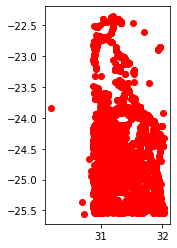

In [35]:
# Отрисовка карты
gdf.plot(color='red')

In [36]:
# файл загрузки 
fp = os.path.join(ROOT_PATH, r"data\Kruger_posts.shp")
gdf1 = gpd.read_file(fp)

<AxesSubplot:>

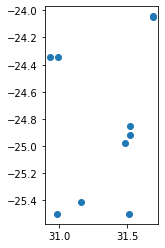

In [38]:
gdf1.head(10).plot()

In [39]:
gdf1.head(10)

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (31.48463 -24.98079)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (31.50891 -25.49922)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (30.93087 -24.34258)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (31.51972 -24.85461)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (31.52084 -24.92107)
5,-24.047833,31.687000,2015-05-07 05:55,88751696,POINT (31.68700 -24.04783)
6,-24.044000,31.687000,2015-03-07 05:57,88751696,POINT (31.68700 -24.04400)
7,-25.498371,30.983844,2015-09-07 06:21,52431146,POINT (30.98384 -25.49837)
8,-24.342279,30.990728,2015-07-07 07:15,11505530,POINT (30.99073 -24.34228)
9,-25.413386,31.159930,2015-11-07 07:17,24990235,POINT (31.15993 -25.41339)


### How long distance individuals have travelled?

##### В этой задаче цель состоит в том, чтобы вычислить "расстояние" в метрах, которое люди прошли в соответствии с постами в социальных сетях (евклидовы расстояния между точками). В этой задаче нам понадобится столбец userid и точки, созданные в предыдущей задаче. Вам понадобится шейп-файл Kruger_posts.shp, сгенерированный в задаче 2 в качестве входного файла.

- Какое самое короткое расстояние было пройдено в метрах?
- Каково было среднее расстояние, пройденное в метрах?
- Какое максимальное расстояние было пройдено в метрах?

In [ ]:
# группируем данные по userid
gdf_userid = gdf1.groupby("userid")
